In [277]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder


In [278]:
data=pd.read_csv('1632560262896716.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
le = LabelEncoder()

data['Gender'] = le.fit_transform(data['Gender'])


In [281]:
data.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int32
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 7.2 KB


In [283]:
data.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [284]:
data.dtypes

CustomerID                int64
Gender                    int32
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [285]:
data.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

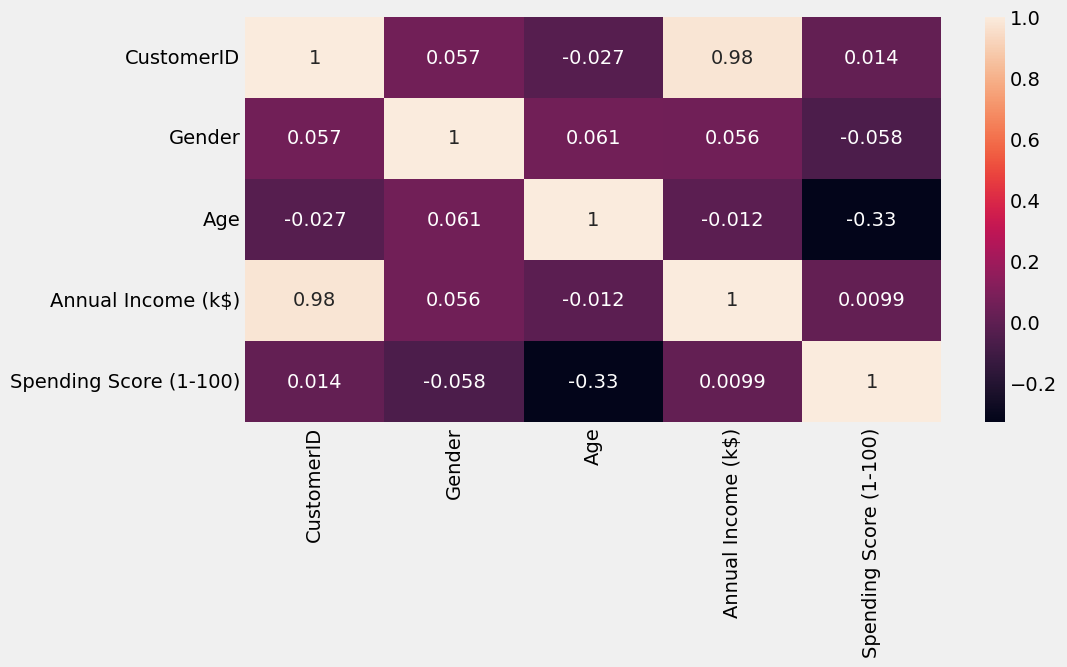

In [335]:
plt.figure(1,(10,5))
sns.heatmap(data.corr(),annot=True)
plt.show()


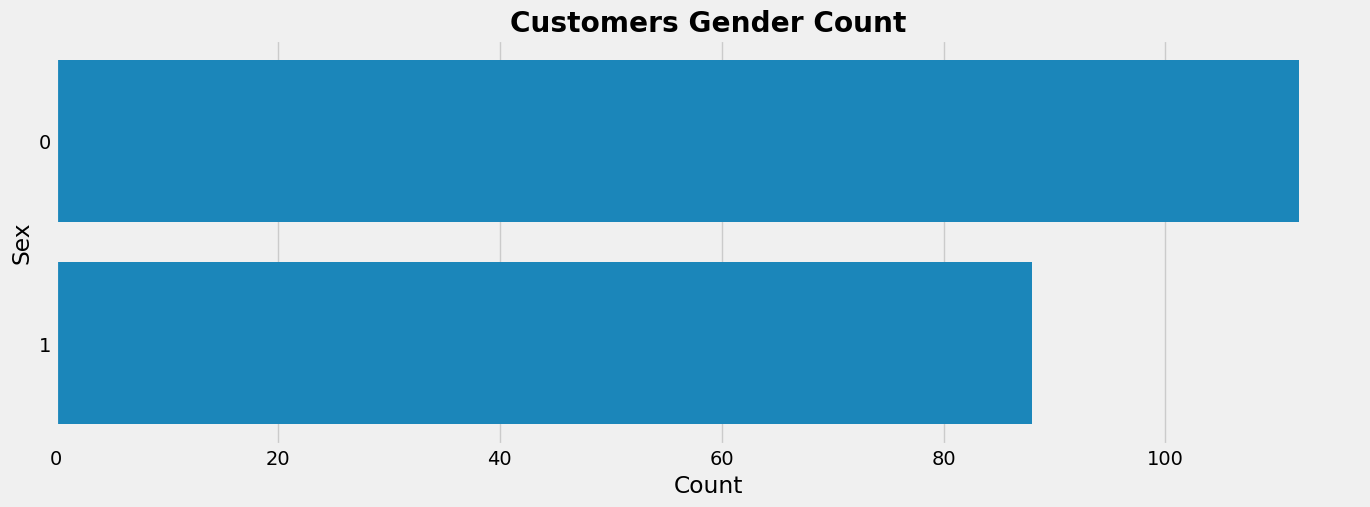

In [231]:
#Graph based on Gender
plt.style.use("fivethirtyeight")
plt.figure(1,figsize=(15,5))
sns.countplot(y='Gender',data=data)
plt.title('Customers Gender Count', 
          fontweight='bold')
plt.xlabel('Count')
plt.ylabel("Sex")
plt.show()


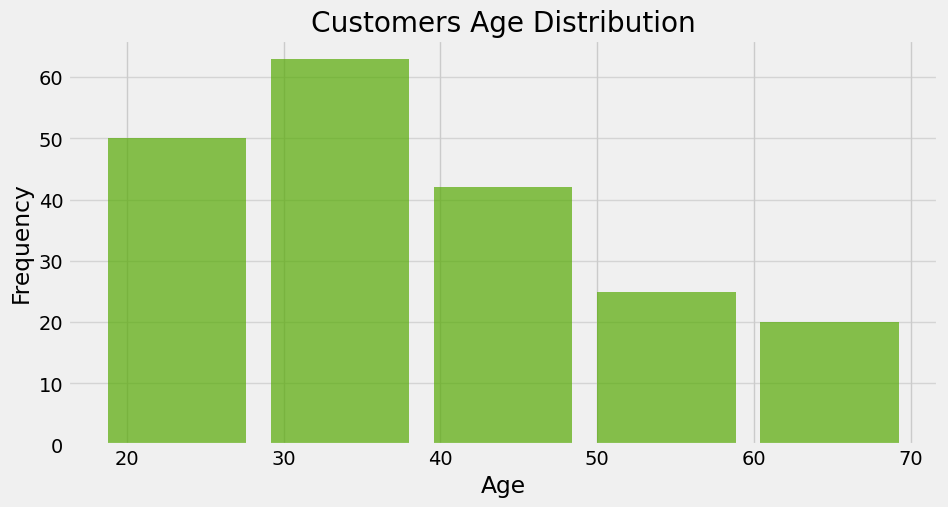

In [232]:
#Graph based on Age
plt.figure(1,figsize=(10,5))
data['Age'].plot.hist(bins=5,color='#56aa04',alpha=0.7,rwidth=0.85)
plt.grid(axis='y',alpha=0.75)
plt.title('Customers Age Distribution')
plt.xlabel('Age')
plt.ylabel("Frequency")
plt.show()


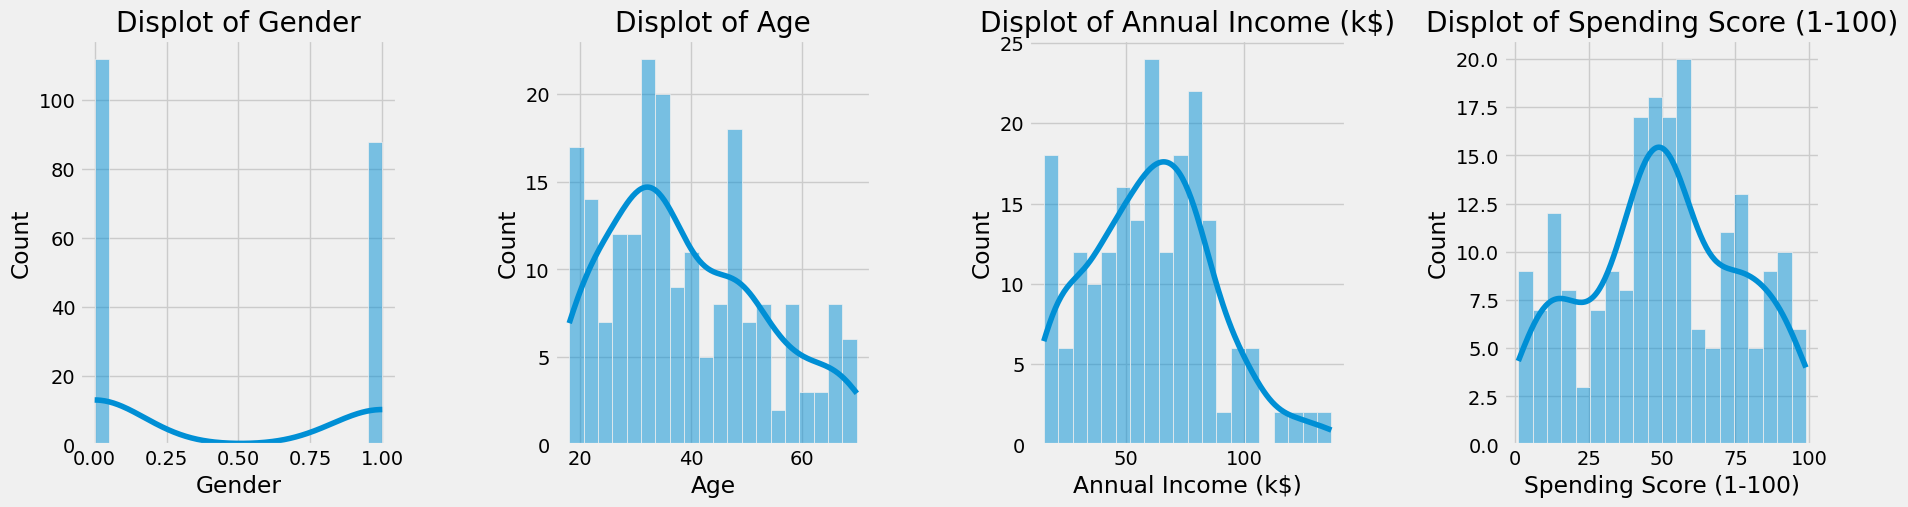

In [290]:
#Plotting Kernel Density Estimate (KDE)

plt.figure(1,figsize=(20,5))

n = 0
for x in ['Gender','Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1,4,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.histplot(data=data,x=x,bins=20,kde=True)
    plt.title('Displot of {}'.format(x))

plt.show()


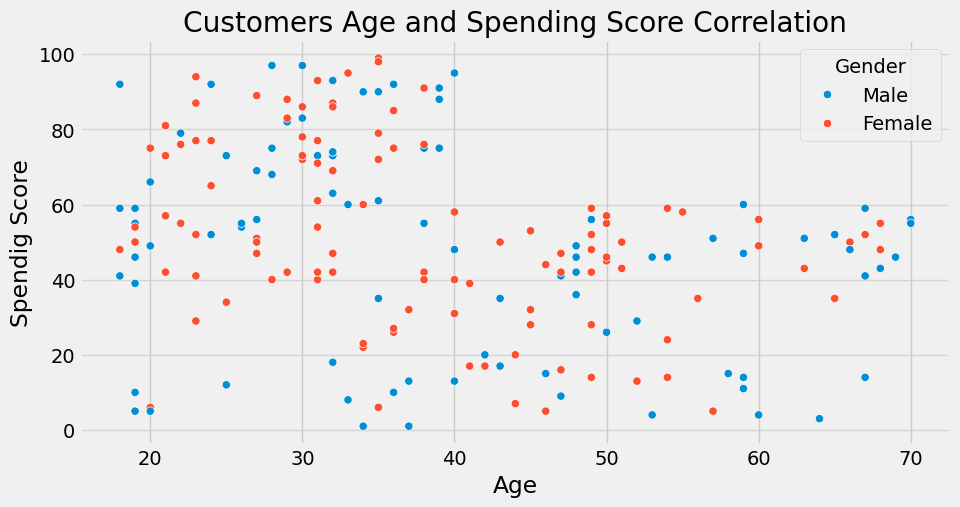

In [253]:
#Graph based on Age vs spending score relationship
plt.figure(1,figsize=(10,5))
sns.scatterplot(data=data,x="Age",y='Spending Score (1-100)',hue='Gender')
plt.grid(axis='y',alpha=0.75)
plt.title('Customers Age and Spending Score Correlation')
plt.xlabel('Age')
plt.ylabel("Spendig Score")
plt.show()


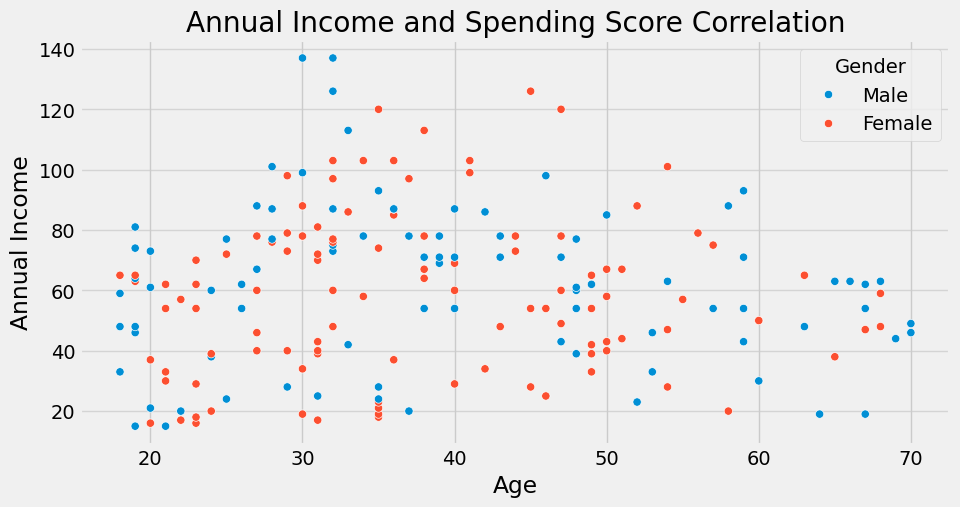

In [161]:
#Graph based on Age vs Annual Income relationship

plt.figure(1,figsize=(10,5))
sns.scatterplot(data=data,x="Age",y='Annual Income (k$)',hue='Gender')
plt.grid(axis='y',alpha=0.75)
plt.title('Annual Income and Spending Score Correlation')
plt.xlabel('Age')
plt.ylabel("Annual Income")
plt.show()


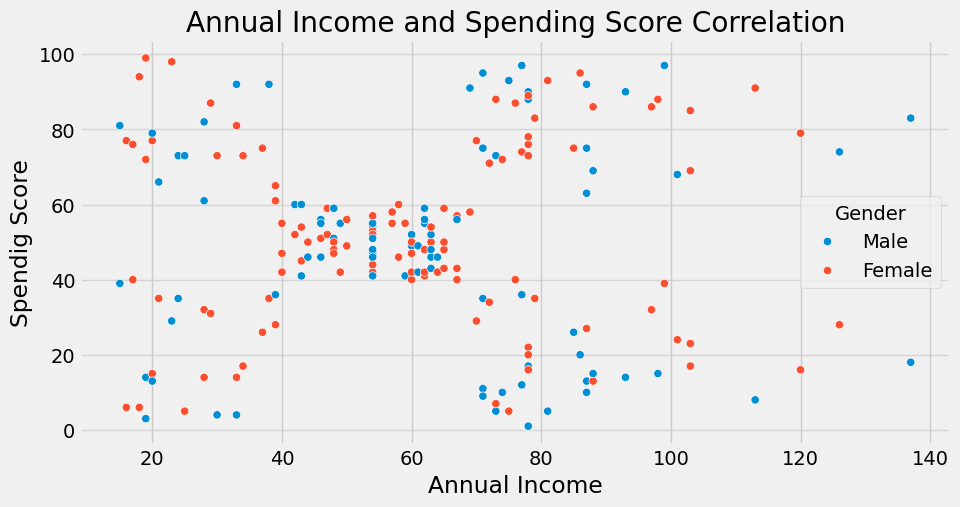

In [119]:
#Graph based on spending score vs Annual Income relationship
plt.figure(1,figsize=(10,5))
sns.scatterplot(data=data,x="Annual Income (k$)",y='Spending Score (1-100)',hue='Gender')
plt.grid(axis='y',alpha=0.75)
plt.title('Annual Income and Spending Score Correlation')
plt.xlabel('Annual Income')
plt.ylabel("Spendig Score")
plt.show()


In [266]:
#Extract Annual Income and Spending Score columns for Clustering
X2 = data[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[:,:].values


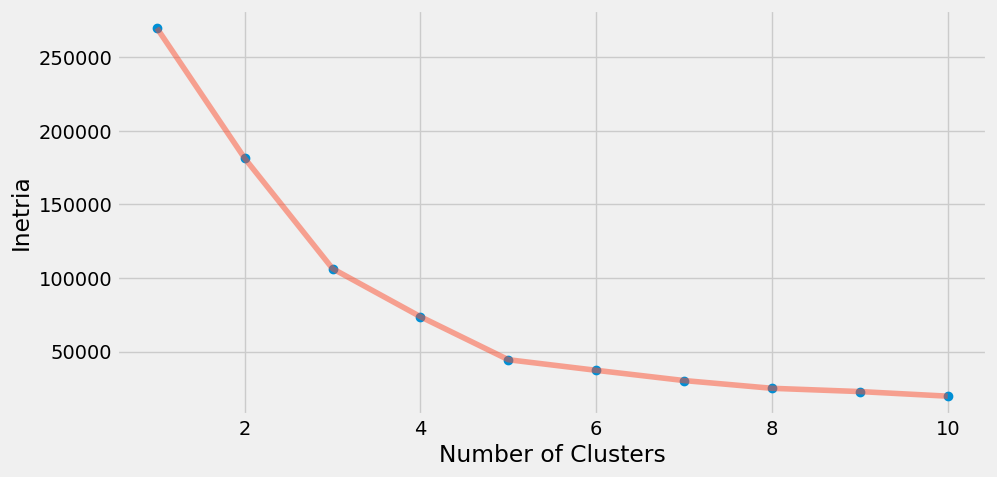

In [294]:
#Determine the appropriate number of cluster using the Elbow Method
inertia = []

for n in range(1,11):
    algorithm_KMeans = (KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,
                 tol=0.0001,random_state=11,algorithm='lloyd'))
    algorithm_KMeans.fit(X2)
    inertia.append(algorithm_KMeans.inertia_)

labels_KMeans = algorithm_KMeans.labels_
centers_KMeans = algorithm_KMeans.cluster_centers_


plt.figure(1,figsize=(10,5))
plt.plot(np.arange(1,11),inertia,'o')
plt.plot(np.arange(1,11),inertia,'-',alpha=0.5)
plt.xlabel("Number of Clusters")
plt.ylabel("Inetria")
plt.show()


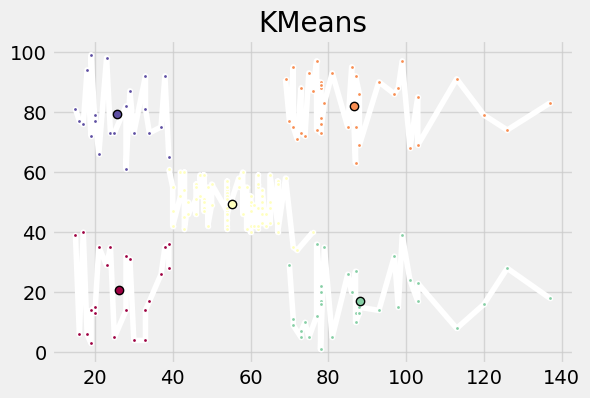

In [295]:

inertia=[]

for n in range(1,6):
    algoritm_KMeans2=(KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=11))
    algoritm_KMeans2.fit(X2)
    inertia.append(algoritm_KMeans2.inertia_)

labels_KMeans2 = algoritm_KMeans2.labels_
centers_KMeans2 = algoritm_KMeans2.cluster_centers_
# print(centers)

fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels_KMeans2))))
ax = fig.add_subplot(1, 1, 1)
cen=[[4,4], [-2, -1], [2, -3], [1, 1],[-4,3],[2,-4]]
for k, col in zip(range(len(centers_KMeans2)), colors):
    my_members = (labels_KMeans2 == k)
    cluster_center = centers_KMeans2[k]
    ax.plot(X2[my_members, 0], X2[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans')
plt.grid(axis='both',alpha=0.75)
# ax.set_xticks(())
# ax.set_yticks(())
plt.show()


In [296]:
y_kmeans=algoritm_KMeans2.fit_predict(X2)

In [297]:
from sklearn.metrics import silhouette_score

silhouette_avg=silhouette_score(X2,y_kmeans)
silhouette_avg

0.553931997444648

In [298]:
from sklearn.metrics import davies_bouldin_score

dbi=davies_bouldin_score(X2,y_kmeans)
print(f"Davies Bouldin Score:{dbi}")

Davies Bouldin Score:0.5725628995597083


In [299]:
from sklearn.metrics import calinski_harabasz_score
#Calculate Calinski_harabasz score
ch_index=calinski_harabasz_score(X2,y_kmeans)
print(f'Calinski Harabasz Index:{ch_index}')

Calinski Harabasz Index:247.35899338037282


Number of clusters found by DBSCAN: 32


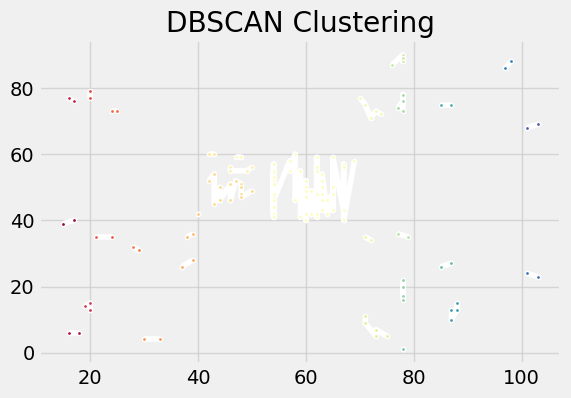

In [329]:
eps = 3
min_samples = 2

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_db = dbscan.fit_predict(X2)

n_clusters = len(np.unique(labels_db))
print(f"Number of clusters found by DBSCAN: {n_clusters}")

fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels_db))))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len(set(labels_db))), colors):
    my_members = (labels_db == k)
    ax.plot(X2[my_members, 0], X2[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
ax.set_title('DBSCAN Clustering')
plt.grid(axis='both', alpha=0.75)
plt.show()


In [331]:
y_dbscan=dbscan.fit_predict(X2)

In [332]:
silhouette_avg2=silhouette_score(X2,y_dbscan)
silhouette_avg2

0.06815381140609145

In [333]:
dbi2=davies_bouldin_score(X2,y_dbscan)
print(f"Davies Bouldin Score:{dbi2}")

Davies Bouldin Score:1.6004024524826357


In [334]:
#Calculate Calinski_harabasz score
ch_index2=calinski_harabasz_score(X2,y_dbscan)
print(f'Calinski Harabasz Index:{ch_index2}')

Calinski Harabasz Index:4.826810053273725


# The DBSCAN method is not suitable for this data.

C:\Users\omid\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


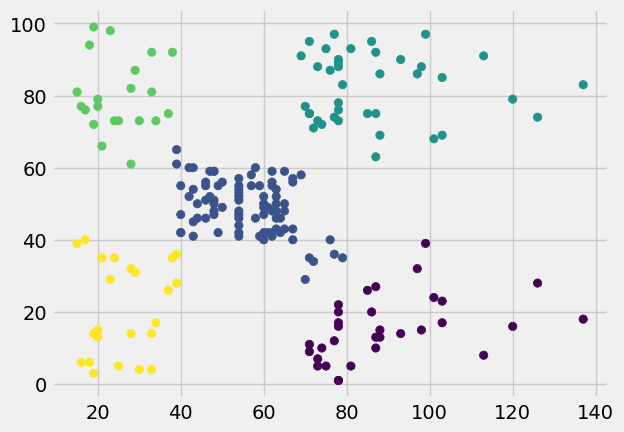

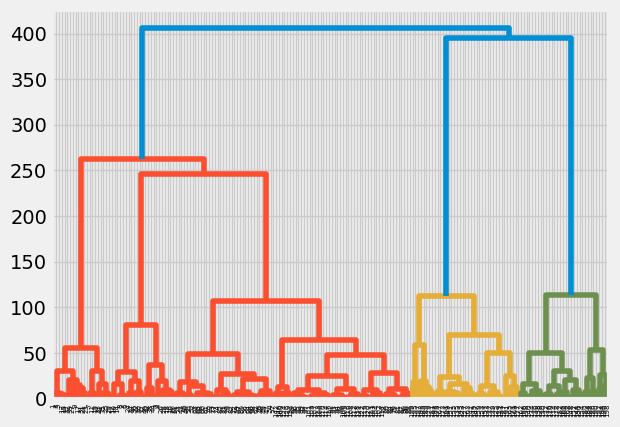

In [337]:
hierarchical = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X2)

plt.scatter(data[['Annual Income (k$)']], data[['Spending Score (1-100)']], c=hierarchical_labels)
plt.show()

linkage_data = linkage(X2, method='ward', metric='euclidean')

dendrogram(linkage_data)
plt.show()


In [338]:
silhouette_avg3=silhouette_score(X2,hierarchical_labels)
silhouette_avg3

0.5529945955148897

In [324]:
dbi3=davies_bouldin_score(X2,hierarchical_labels)
print(f"Davies Bouldin Score:{dbi3}")

Davies Bouldin Score:0.5782207452369454


In [325]:
ch_index3=calinski_harabasz_score(X2,hierarchical_labels)
print(f'Calinski Harabasz Index:{ch_index3}')

Calinski Harabasz Index:243.07142892964563
